# 線型回帰分析　( 単回帰分析 )

- 目的変数を説明する説明変数の方程式を求める
$$y=ax+b$$

## data の準備
- 必要な初期設定
- *LinearRegression*　:　線型回帰
- *load_boston*　:　ボストン市の住宅価格の data set を読み出す関数
- *train_test_split*　:　data を学習用・テスト用に分ける関数

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 乱数の種を　1 / 再現性を保持する為
np.random.seed(1)

# scikit-learn model を読み込む
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Boston data set を読み出す
boston = load_boston()

## load data 概要
- **data　は　dictionary　形式**
    - *data*　:　説明変数
    - *target*　:　目的変数 （1000ドル単位の不動産価格の中央値）
    - *feature_names*　:　説明変数の paramerter名
    - *DESCR*　:　data の詳細の説明
    - *filename*　:　ファイル名

In [3]:
# data の中の key を出力
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### data の詳細説明 : DESCR / description

In [4]:
# 各　paramerter の詳細説明
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 説明変数の paramerter / featuer names

In [5]:
# 各 paramerter の説明
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### 説明変数の値一覧

In [6]:
# 説明変数
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


### 目的変数の一覧 / target 

In [7]:
# 目的変数
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

- 上記の内容だけでは理解できないので pandas に移す

## pandas で表示

- データをpandasに移す

### データの概要
|変数|説明|
|:---|:---|
|CRIM|犯罪発生率|
|ZN|25,000平方フィート以上の住宅区画の割合|
|INDUS|非小売業種の土地面積の割合|
|CHAS|チャールズ川沿いかを表すダミー変数|
|NOX|窒素酸化物の濃度|
|RM|平均部屋数|
|AGE|1940年より前に建てられた建物の割合|
|DIS|5つのボストンの雇用施設への重み付き距離|
|RAD|高速道路へのアクセスのしやすさ|
|TAX|10,000ドルあたりの不動産税率|
|PTRATIO|生徒と教師の割合|
|B|黒人の割合|
|LSTAT|低所得者の割合|
|MEDV|住宅価格の中央値（1,000単位）|

In [8]:
# 説明変数 （ boston.data ）をDataFrameに保存
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# 目的変数 ( boston.target )も DataFrameに追加
boston_df['MEDV'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 回帰分析の実行

### まずは...
- *全ての data が必要か？ を見極める*
    - パラメータ同士の相関関係を数値化する
    - 相関関係のないパラメータ同士では回帰分析は出来ない
    - **相関係数（そうかんけいすう）**で相関関係があるかどうか判断する
        - 共分散と標準偏差を求めることにより計算可能

### 共分散の式
- **共分散** … 2つの変数の関係を表す値
- 「事象$X$が起こるときに事象$Y$も起こる傾向があるか」のように2つの確率変数の関係性を表す
    - 共分散が大きい（正）→ $X$ が大きいとき$Y$も大きい傾向がある
    - 共分散が 0 に近い→ $X$と$Y$にあまり関係はない
    - 共分散が小さい（負）→ $X$が大きいとき$Y$も小さい傾向がある
- 事象$X$,$Y$の$n$個のデータ $X=\{x_1,x_2,⋯x_n\}$、$Y=\{y_1,y_2,⋯,y_n\}$

$$
    s_{xy} = \frac{1}{n}\sum_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})
$$
<center>
($\overline{x}$: $X$の平均　$\overline{y}$: $Y$の平均)
</center>

### X,Yの標準偏差
$$
    s_x=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i-\overline{x})^2 \quad}  s_y=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\overline{y})^2 \quad}
$$



### 相関係数の式
- $X$,$Y$の値の共分散を$X$の標準偏差と$Y$の標準偏差で割ったもの
- 共分散の問題点…客観的な評価が出来ない　→　相関係数を使用

$$
r = \frac{s_{xy}}{s_x×s_y}
$$


### 相関係数の値
|相関係数|相関の強さ|
|:---|:---|
|0.7 〜 1.0|強い正の相関|
|0.4 〜 0.7|正の相関|
|0.2 〜 0.4|弱い正の相関|
|-0.2 〜 0.2|ほとんど相関関係がない|
|-0.4 〜 -0.2|弱い負の相関|
|-0.7 〜 -0.4|負の相関|
|-1.0 〜 -0.7|強い負の相関|

In [9]:
# 相関係数を導き出す / .corr() 全ての　paramerter の相関係数を　DataFrameで出力してくれる
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### 正の相関
- RM ( 平均部屋数 )と MEDV ( 住宅価格 )の散布図
- 正の相関 ( 相関係数 : 0.695360 ) がある

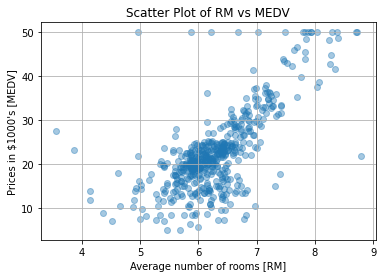

In [10]:
# DataFrame から numpy.ndarray に変換
X = boston_df[['RM']].values
Y = boston_df[['MEDV']].values
plt.scatter(X, Y, alpha=0.4)

plt.title('Scatter Plot of RM vs MEDV')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Prices in $1000\'s [MEDV]')
plt.grid()
plt.show()

- **見るからに右肩上がりの直線が引ける形になっている**
    - 関係性が見られる

### 負の相関
- LSTAT ( 低所得者の割合 ) と MEDV ( 住宅価格 ) の散布図
- 負の相関 ( 相関係数 : -0.737663 ) がある

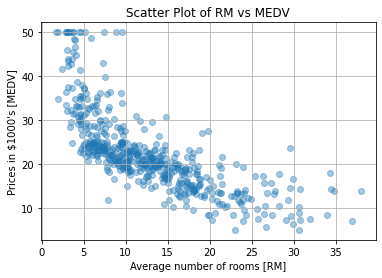

In [11]:
# DataFrame -> numpy.ndarrayへ
X = boston_df[['LSTAT']].values
Y = boston_df[['MEDV']].values
plt.scatter(X, Y, alpha=0.4)
plt.title('Scatter Plot of RM vs MEDV')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Prices in $1000\'s [MEDV]')
plt.grid()
plt.show()

- **右肩下がりでこちらも関係性が見て取れる**

### 相関係数が低いもので実施
- DIS(5つのボストンの雇用施設への重み付き距離)とMEDV(住宅価格)の散布図
- 弱い正の相関（相関係数：0.249929）がある

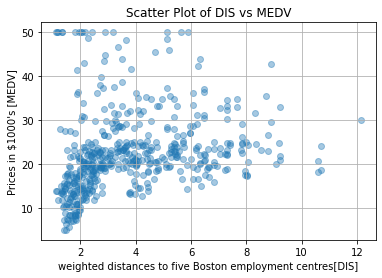

In [12]:
# DataFrameからnumpy.ndarrayに変換
X = boston_df[['DIS']].values
Y = boston_df[['MEDV']].values
# 散布図を描画
plt.scatter(X, Y, alpha=0.4) 

plt.title('Scatter Plot of DIS vs MEDV')
plt.xlabel('weighted distances to five Boston employment centres[DIS]') 
plt.ylabel('Prices in $1000\'s [MEDV]')
plt.grid()
plt.show()

- 相関係数が弱いと中々関係性を見つける事は難しくなる

## 回帰分析

- **回帰分析を行う**
    1. data を学習用, test用に 7 : 3 に分割する
    1. LinearRegression class の instance を生成
    1. fit method で学習 data を与える
    1. `最小二乗法`
        - 単回帰直線を求める
        - 誤差の2乗の和を最小にすることで、最も確からしい関係式を求める
    1. 説明変数の係数と切片が得られる


### 得られる式
$$y　=　ax+b$$


|パラメータ|概要|
|:---:|:---|
|$x$|説明変数|
|$y$|目的変数
|$a$|説明変数$x$の係数|
|$b$|切片|

In [13]:
# 一旦　RM と EV の値を numpy の配列に直す
X = boston_df[['RM']].values      # 部屋数
Y = boston_df[['MEDV']].values    # 価格の中央値

# data を学習用と検証用に分割 / train size : 70%を学習用として切り取る
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

# 線形回帰の学習器の生成
lr = LinearRegression()

# 線形モデルの重みを学習
lr.fit(X_train, Y_train)

print(f'coefficient = {lr.coef_[0]}')  # 説明変数の係数を出力 : a
print(f'intercept = {lr.intercept_}')  # 切片を出力 : b

coefficient = [8.46109164]
intercept = [-30.57103241]


- **X or Y _train**
    - X or Y の学習用 data : 70%


- **X or Y _test**
    - X or Y の test用 data : 30%


- **train_test_split**
    - random に中でシャッフルしている
    - random.seed(1) で種を指定しているので同じ検証結果が返ってくる


### 散布図に直線をplot

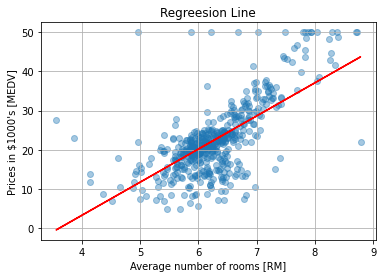

In [14]:
# 線形回帰モデルの直線と散布図をplot

# 説明変数と目的変数の　data　を plot
plt.scatter(X, Y, alpha=0.4)
plt.plot(X, lr.predict(X), color='r')      # 回帰直線を　plot
plt.title('Regreesion Line')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Prices in $1000\'s [MEDV]')
plt.grid()
plt.show()

## 回帰分析の評価
- **予測結果が妥当かどうかを調べる必要がある**


- 残差を plot して回帰分析の性能を視覚的に評価
- 回帰直線, 散布図の点の差を描画
    - *縦軸　:　残差*
    - *横軸　:　予測値*

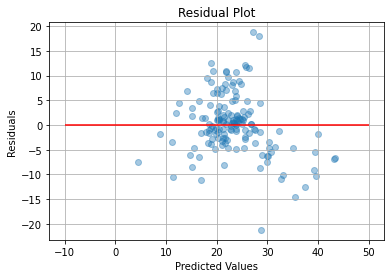

In [15]:
# 検証 data を用いて目的変数を予測する
Y_pred = lr.predict(X_test)

# 残差を plot
plt.scatter(Y_pred, Y_pred - Y_test, alpha=0.4)

# x軸に沿った直線を plot
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'r')  # horizontal line : 水平線
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

#### 予測性能が良ければ残差は小さくなる

### `平均二乗誤差`
- *Mean Squared Error*
    - **機械学習の場合 Error は 誤差という意味**
        - Mean　:　平均
        - Squared　:　異常
        - Error　:　誤差


- **実際の値と線形回帰モデルによる予測値のズレ（誤差）がどれだけあるかを示す**
    - 値が小さければ小さいほど良いモデル


<div>
<img src="../Resources/img/regression_difference.png">
</div>


$$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2
$$
<center>
($y_i$:$i$番目の実際の値　　$\hat{y_i}$:$i$番目の予測値)
</center>


### 誤差の２乗の平均　=　MSE　

In [16]:
#　平均二乗誤差による評価
from sklearn.metrics import mean_squared_error

# 学習 data に対する目的変数を予測
Y_train_pred = lr.predict(X_train)

# test data に対する目的変数を予測
Y_test_pred = lr.predict(X_test)

# 学習 data, test data を用いた時の平均二乗誤差
print(f'MSE train data: {mean_squared_error(Y_train, Y_train_pred)}')
print(f'MSE test data: {mean_squared_error(Y_test, Y_test_pred)}')

MSE train data: 46.938573719831254
MSE test data: 36.517214730838624


## 決定係数
- 決定係数$R^2$スコア
- 0.0〜1.0の範囲の値をとる
- 値が大きいほどモデルが適切にデータを表現できている
- MSEよりも客観的な評価が可能

$$
    R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y_i})^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}
$$

<center>
($y_i$:$i$番目の実際の値　
$\bar{y}$:実際の値の平均値　
$\hat{y_i}$:$i$番目の予測値)
</center>

### 決定係数の判断基準の目安
|$R^2$|判断内容|
|---|:---|
|0.6以下|モデルとして意味なしていない|
|0.8～0.9|かなり良いモデル|
|0.9以上|過学習の可能性がある|

In [22]:
# 決定係数 ( R2スコア )による評価
from sklearn.metrics import r2_score
print(f'r^2 train data: ', r2_score(Y_train, Y_train_pred))
print(f'r^2 train data: ', r2_score(Y_test, Y_test_pred))

r^2 train data:  0.5381606119103881
r^2 train data:  0.5574346656874105


#### 学習用とtest用の　$R^2$　の乖離が大きい　=　汎化性能は低い
- いま出したモデルはあまり良いモデルではない
    - 学習の時のdataの取得の仕方が悪い
    - 説明変数として RM ( 平均部屋数 ) だけでは不十分ではないのか？
        - **２つの原因が考えられる**

## 問題

In [30]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [31]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


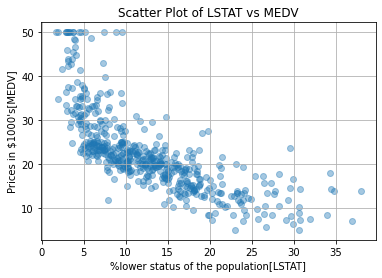

In [32]:
X = boston_df[['LSTAT']].values
Y = boston_df[['MEDV']].values
plt.scatter(X, Y, alpha = 0.4)
plt.title('Scatter Plot of LSTAT vs MEDV')
plt.xlabel('%lower status of the population[LSTAT]')
plt.ylabel('Prices in $1000\'s[MEDV]')
plt.grid()
plt.show()

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)
lr = LinearRegression()
lr.fit(X_train, Y_train)
print(f'傾き: a {lr.coef_[0]}\n切片: b {lr.intercept_}')

傾き: a [-0.9166916]
切片: b [34.22183685]


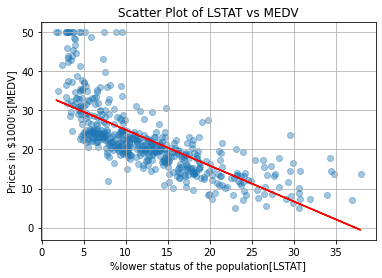

In [34]:
plt.scatter(X, Y, alpha=0.4)
plt.plot(X, lr.predict(X), color='r')
plt.title('Scatter Plot of LSTAT vs MEDV')
plt.xlabel('%lower status of the population[LSTAT]')
plt.ylabel('Prices in $1000\'s[MEDV]')
plt.grid()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
Y_train_pred = lr.predict(X_train)
Y_test_pred =lr.predict(X_test)
print(f'train: {mean_squared_error(Y_train, Y_train_pred)}')
print(f'test: {mean_squared_error(Y_test, Y_test_pred)}')

train: 36.79905478327651
test: 42.620243471539716


In [39]:
from sklearn.metrics import r2_score
print(f'r^2 train data: {r2_score(Y_train, Y_train_pred)}')
print(f'r^2 test data: {r2_score(Y_test, Y_test_pred)}')

r^2 train data: 0.5467486221534437
r^2 test data: 0.5349901044757203
